In [1]:
#Librairies
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#Game
#Le jeu est stocké sous une forme de class
class game:
    
    def __init__(self):
        #Initialise la partie
        #Variables
        self.board = np.zeros((4,4),dtype=int)
        self.spawnNumber()
        
    #def gameOver(self):
    #    return not((self.board != 0).any())
        
    def spawnNumber(self):
        #Spawn 2 or 4 in a rand spot
        
        #Number
        # 1 2 3 4
        # 5 6 7 8
        # 9 10 11 12
        # 13 14 15 16
        empty_spot = []
        for i in range(len(self.board)):
            for j in range(len(self.board[i])):
                if self.board[i][j] == 0:
                    empty_spot.append((i,j))
        
        #Choose the empty spot
        spot = random.choice(empty_spot)
                    
        #Choose 2 or 4
        n = 2
        if random.random() > 0.9:#90 chance of getting 2
            n = 4
        
        self.board[spot] = n
        
    def move_up(self):
        #Stack all number up
        for j in range(len(self.board[0])):
            new_c = []
            for i in range(len(self.board)):
                if self.board[i,j] != 0:
                    new_c.append(self.board[i,j])
                    self.board[i,j] = 0
            if len(new_c)>=1:
                while self.addable(new_c):
                        new_c = self.add(new_c)
            
            for i in range(len(new_c)):
                self.board[i,j] = new_c[i]
                
    def move_down(self):
        #Stack all number down
        for j in range(len(self.board[0])):
            new_c = []
            for i in range(len(self.board)-1,-1,-1):
                if self.board[i,j] != 0:
                    new_c.append(self.board[i,j])
                    self.board[i,j] = 0
            if len(new_c)>=1:
                while self.addable(new_c):
                        new_c = self.add(new_c)
            
            for i in range(len(new_c)):
                self.board[len(self.board)-i-1,j] = new_c[i]
                
    def move_left(self):
        for i in range(len(self.board)):
            new_l = []
            for j in range(len(self.board[0])):
                if self.board[i,j] != 0:
                    new_l.append(self.board[i,j])
                    self.board[i,j] = 0
                    
            if len(new_l)>= 1:
                while self.addable(new_l):
                    new_l = self.add(new_l)
                    
            for j in range(len(new_l)):
                self.board[i,j] = new_l[j]
                
    def move_right(self):
        for i in range(len(self.board)):
            new_l = []
            for j in range(len(self.board[0])-1,-1,-1):
                if self.board[i,j] != 0:
                    new_l.append(self.board[i,j])
                    self.board[i,j] = 0
                    
            if len(new_l)>= 1:
                while self.addable(new_l):
                    new_l = self.add(new_l)
                    
            for j in range(len(new_l)):
                self.board[i,len(self.board[0])-1-j] = new_l[j]
                
    def addable(self,li):
        #True if you can add numbers
        a = li[0]
        for i in range(1,len(li)):
            b = li[i]
            if a == b:
                return True
            a = b
        return False
    def add(self,li):
        res = []
        to_delete = -1
        for i in range(len(li)-1):
            if li[i] == li[i+1] and i != to_delete:
                res.append(2*li[i])
                to_delete = i+1
            elif i!= to_delete:
                res.append(li[i])
        if to_delete != len(li)-1:
            res.append(li[-1])
        return res
    
    def play(self,move):
        #if self.gameOver():
        #    return (sum(sum(self.board)))
        #else:
        before_board = np.copy(self.board)
        if move == 0:
            self.move_left()
        elif move == 1:
            self.move_up()
        elif move == 2:
            self.move_right()
        elif move == 3:
            self.move_down()

        if (before_board == self.board).all():
            return False

        self.spawnNumber()
        return True
                
            

In [5]:
jeu2 = game()
jeu2.board
print(jeu2.play(3))
print(jeu2.board)

False
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]]


In [8]:
def random_moves(jeu):
    while True:
        moves = np.random.permutation(4)
        i = 0
        while i <= 3:
            state = jeu.play(moves[i])
            if not(state) and i == 3:
                return sum(sum(jeu.board))
            elif state:
                i = 4
            elif not(state):
                i += 1
    
def random_games(n):
    score = []
    for i in range(n):
        jeu = game()
        score.append(random_moves(jeu))
    return score

def brutus_moves(jeu):
    while True:
        moves = [3,2,1,0]
        i = 0
        while i <= 3:
            state = jeu.play(moves[i])
            if not(state) and i == 3:
                return sum(sum(jeu.board))
            elif state:
                i = 4
            elif not(state):
                i += 1
                
def brutus_games(n):
    score = []
    for i in range(n):
        jeu = game()
        score.append(brutus_moves(jeu))
    return score

In [9]:
scores = brutus_games(1000)
print(min(scores),max(scores),np.mean(scores))

120 1112 495.002


In [78]:
def disp(jeu):
    fig = plt.figure(figsize=(4,4))
    gs = fig.add_gridspec(2, 2)
    for i in range(2):
        for j in range(2):
            ax = fig.add_subplot(i+1,j+1,i+j+1,fc="red")
            ax.annotate("i", (1., 1.), (0., 0.))
    fig.show()

C:\Users\Alexis-Surface\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\Alexis-Surface\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


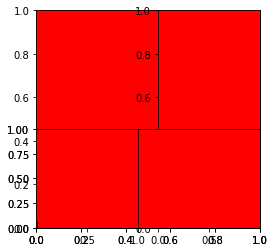

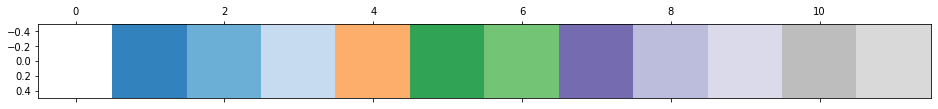

In [79]:
brutus_moves(jeu2)
disp(jeu2)
plt.matshow(np.log([[0,2,4,8,16,32,64,128,256,512,1024,2048]]),cmap='tab20c')
plt.show()

In [43]:
jeu2.board

array([[  2,   4,   8,  16],
       [  4,   8,  16,  64],
       [  8,  32,  64, 128],
       [  2,   8, 128, 256]])